In [ ]:
import pandas as pd
print(pd. __version__)

In [ ]:
pip install pandas --upgrade

In [ ]:
pip install numpy --upgrade

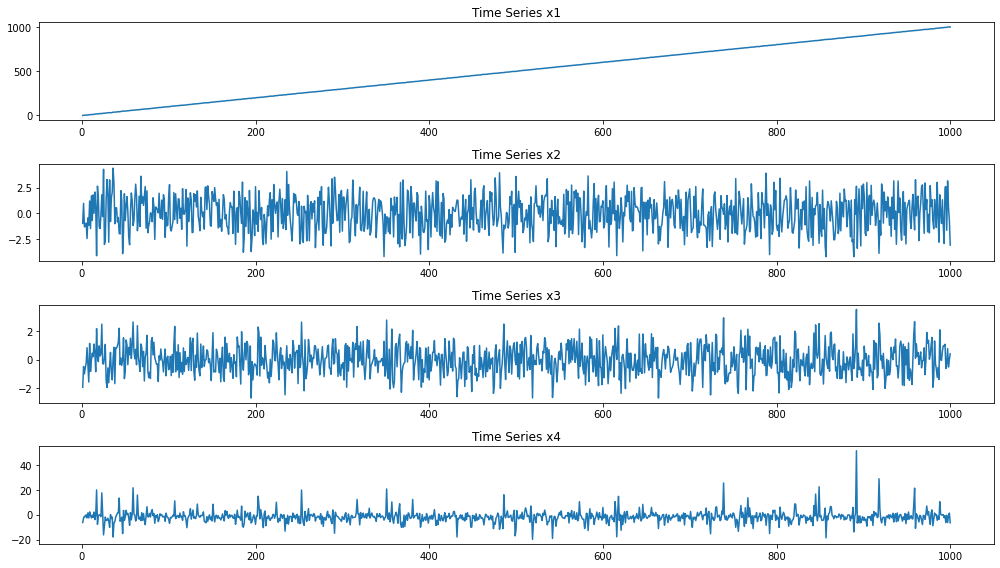

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 1000  # Length of the time series
alpha = 1.0  # Value of alpha
beta = 0.5  # Value of beta
noise_std = 1.0  # Standard deviation of noise

# Time vector
t = np.linspace(1, N, N)

# Piecewise function β(t)
beta_t = np.where(t <= N / 2, 0, beta)

# Function z(t) = αt + β(t)
z_t = alpha * t + beta_t

# Noise terms
e1 = np.random.normal(0, noise_std, N)
e2 = np.random.normal(0, noise_std, N)
e3 = np.random.normal(0, noise_std, N)
e4 = np.random.normal(0, noise_std, N)

# Equations for x1, x2, x3, x4
x1 = z_t + e1
x2 = -2 * np.sin(2 * x1) + e2
x3 = np.exp(-x1) * x2 + e3
x4 = x3**3 - x2**2 * np.cos(x3) + e4

# Plot the time series
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(t, x1)
plt.title('Time Series x1')

plt.subplot(4, 1, 2)
plt.plot(t, x2)
plt.title('Time Series x2')

plt.subplot(4, 1, 3)
plt.plot(t, x3)
plt.title('Time Series x3')

plt.subplot(4, 1, 4)
plt.plot(t, x4)
plt.title('Time Series x4')

plt.tight_layout()
plt.show()


In [6]:
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

df_data = data
features = df_data[['x1', 'x2', 'x3']]
target = df_data['x4']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

df_data = data
features = df_data[['x1', 'x2', 'x3', 'x4']]
target = df_data['x4']

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Defining the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Training the model
mlp.fit(X_train, y_train)

# Predicting on the test set
y_pred = mlp.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

mse


0.003444927981077866

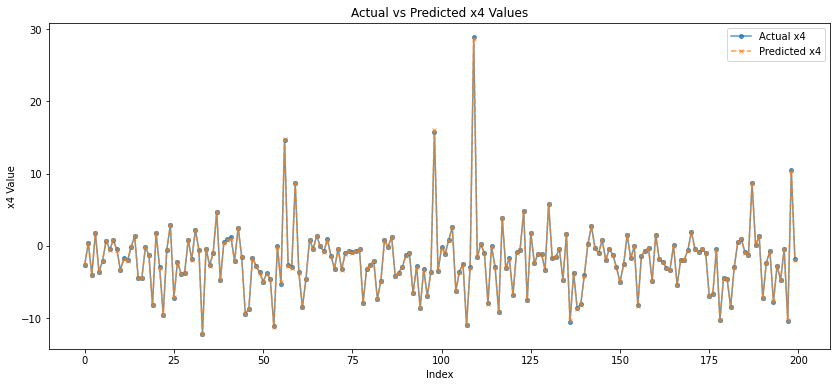

In [17]:
# Plotting the real vs predicted values over time/index
plt.figure(figsize=(14, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual x4', marker='o', linestyle='-', markersize=4, alpha=0.75)
plt.plot(y_pred, label='Predicted x4', marker='x', linestyle='--', markersize=4, alpha=0.75)
plt.title('Actual vs Predicted x4 Values')
plt.xlabel('Index')
plt.ylabel('x4 Value')
plt.legend()
plt.show()


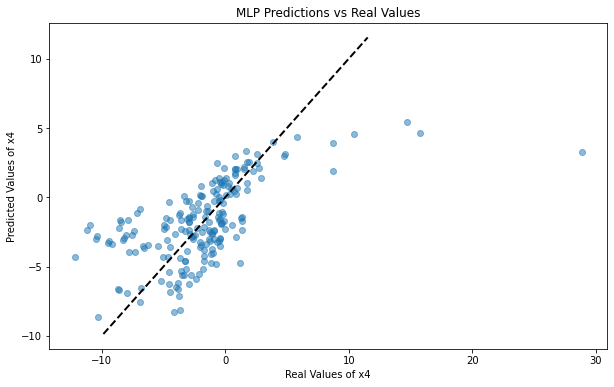

In [9]:
import matplotlib.pyplot as plt

# Plotting the predictions against the real values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('MLP Predictions vs Real Values')
plt.xlabel('Real Values of x4')
plt.ylabel('Predicted Values of x4')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Line for perfect predictions
plt.show()


In [18]:
#NOW CODE WITH X1 (we dont need that! causal graph it has no influence? )
data = pd.DataFrame({

    'x4': x4
})

df_data = data
features = df_data[['x4']]
target = df_data['x4']

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Defining the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Training the model
mlp.fit(X_train, y_train)

# Predicting on the test set
y_pred = mlp.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

mse


0.003963982561380701

In [26]:
split_index = int(len(df_data) * 0.8)
data = pd.DataFrame({
    'x2': x2,
    'x3': x3,
    'x4': x4
})

df_data = data
features = df_data[['x2', 'x3']]
target = df_data['x4']
# Splitting the dataset without shuffling
X_train_ordered = features[:split_index]
y_train_ordered = target[:split_index]
X_test_ordered = features[split_index:]
y_test_ordered = target[split_index:]

# Training the MLP model on the ordered split
mlp_ordered = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_ordered.fit(X_train_ordered, y_train_ordered)

# Predicting on the test set
y_pred_ordered = mlp_ordered.predict(X_test_ordered)

# Evaluating the model on the ordered split
mse_ordered = mean_squared_error(y_test_ordered, y_pred_ordered)

mse_ordered

c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


6.572336313988419

In [29]:
y_test_ordered

800    -3.277260
801    -2.228803
802   -10.279850
803     6.050915
804    -1.087030
         ...    
995    -0.385655
996    -6.344415
997    -1.266772
998     1.261668
999    -6.537705
Name: x4, Length: 200, dtype: float64

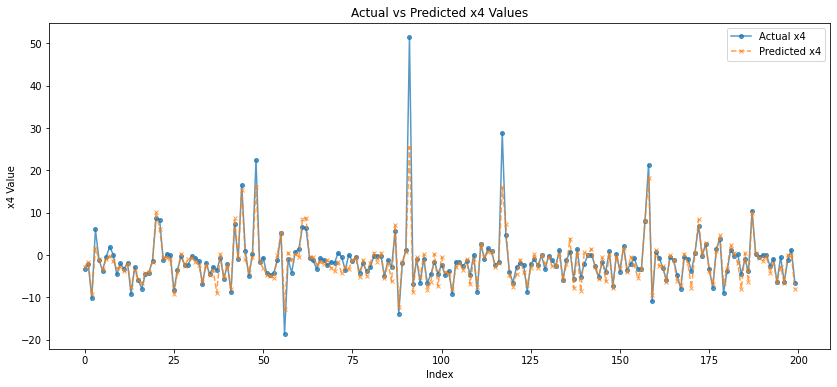

In [32]:
# Plotting the real vs predicted values over time/index
plt.figure(figsize=(14, 6))
plt.plot(y_test_ordered.reset_index(drop=True), label='Actual x4', marker='o', linestyle='-', markersize=4, alpha=0.75)
plt.plot(y_pred_ordered , label='Predicted x4', marker='x', linestyle='--', markersize=4, alpha=0.75)
plt.title('Actual vs Predicted x4 Values')
plt.xlabel('Index')
plt.ylabel('x4 Value')
plt.legend()
plt.show()


In [22]:
y_test

521    -2.622882
737     0.390310
740    -3.969867
660     1.798700
411    -3.614080
         ...    
408    -4.697604
332    -0.445257
208   -10.404315
613    10.464947
78     -1.829479
Name: x4, Length: 200, dtype: float64

In [19]:
X_test

,x4
521,-2.622882
737,0.390310
740,-3.969867
660,1.798700
411,-3.614080
...,...
408,-4.697604
332,-0.445257
208,-10.404315
613,10.464947


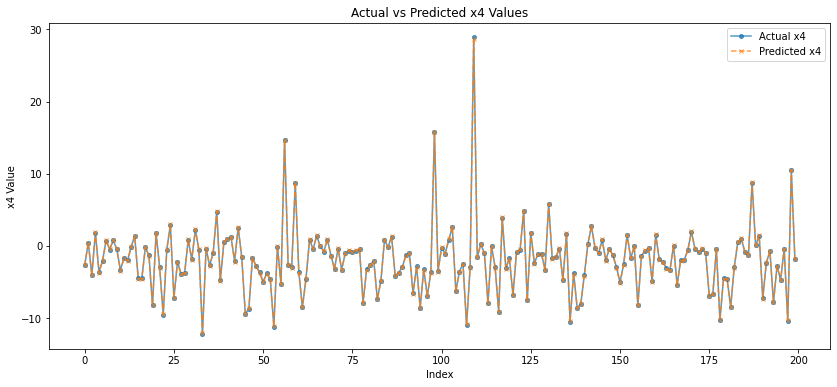

In [24]:
# Plotting the real vs predicted values over time/index
plt.figure(figsize=(14, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual x4', marker='o', linestyle='-', markersize=4, alpha=0.75)
plt.plot(y_pred, label='Predicted x4', marker='x', linestyle='--', markersize=4, alpha=0.75)
plt.title('Actual vs Predicted x4 Values')
plt.xlabel('Index')
plt.ylabel('x4 Value')
plt.legend()
plt.show()


In [13]:
X_train

,x2,x3
29,1.897874,-0.587115
535,3.355909,0.820298
695,2.062967,-1.079533
557,2.316774,1.112101
836,-2.694323,0.928091
...,...,...
106,-0.599789,2.337828
270,-0.673625,-0.362348
860,0.363341,-0.825833
435,-0.670915,-0.326234


In [15]:
#NOW CODE WITH X1 (we dont need that! causal graph it has no influence? )
data = pd.DataFrame({
    'x2': x2,
    'x3': x3,
    'x4': x4
})

df_data = data
features = df_data[['x2', 'x3', 'x4']]
target = df_data['x4']

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Defining the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Training the model
mlp.fit(X_train, y_train)

# Predicting on the test set
y_pred = mlp.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

mse


KeyError: "['x1'] not in index"

In [ ]:
# Perform Augmented Dickey-Fuller test
result = adfuller(x4)

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[0] < result[4]['5%']:
    print("Reject the null hypothesis - Data is stationary")
else:
    print("Failed to reject the null hypothesis - Data is non-stationary")


  0%|          | 0/4 [00:00<?, ?it/s]

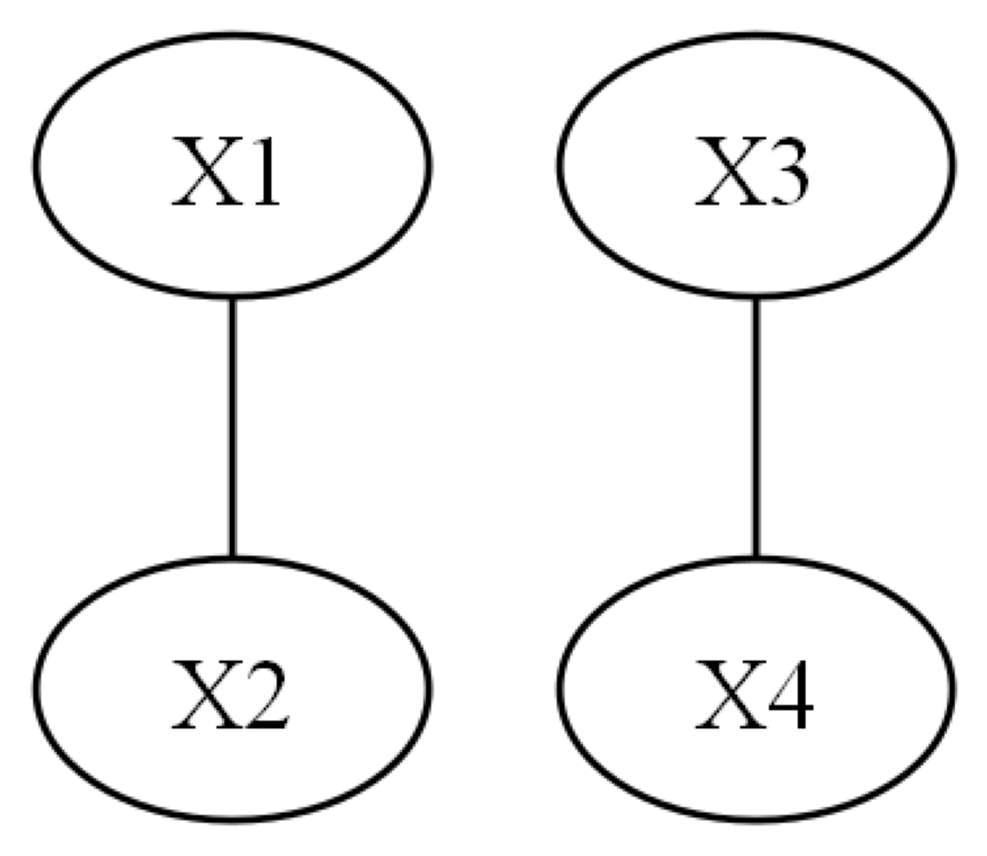

In [50]:
from causallearn.search.ConstraintBased.PC import pc
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

# default parameters
cg = pc(data.values)

# # or customized parameters
# cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

# visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

  0%|          | 0/2 [00:00<?, ?it/s]

Edges in the estimated DAG:
[('x4', 'x3'), ('x2', 'x1')]


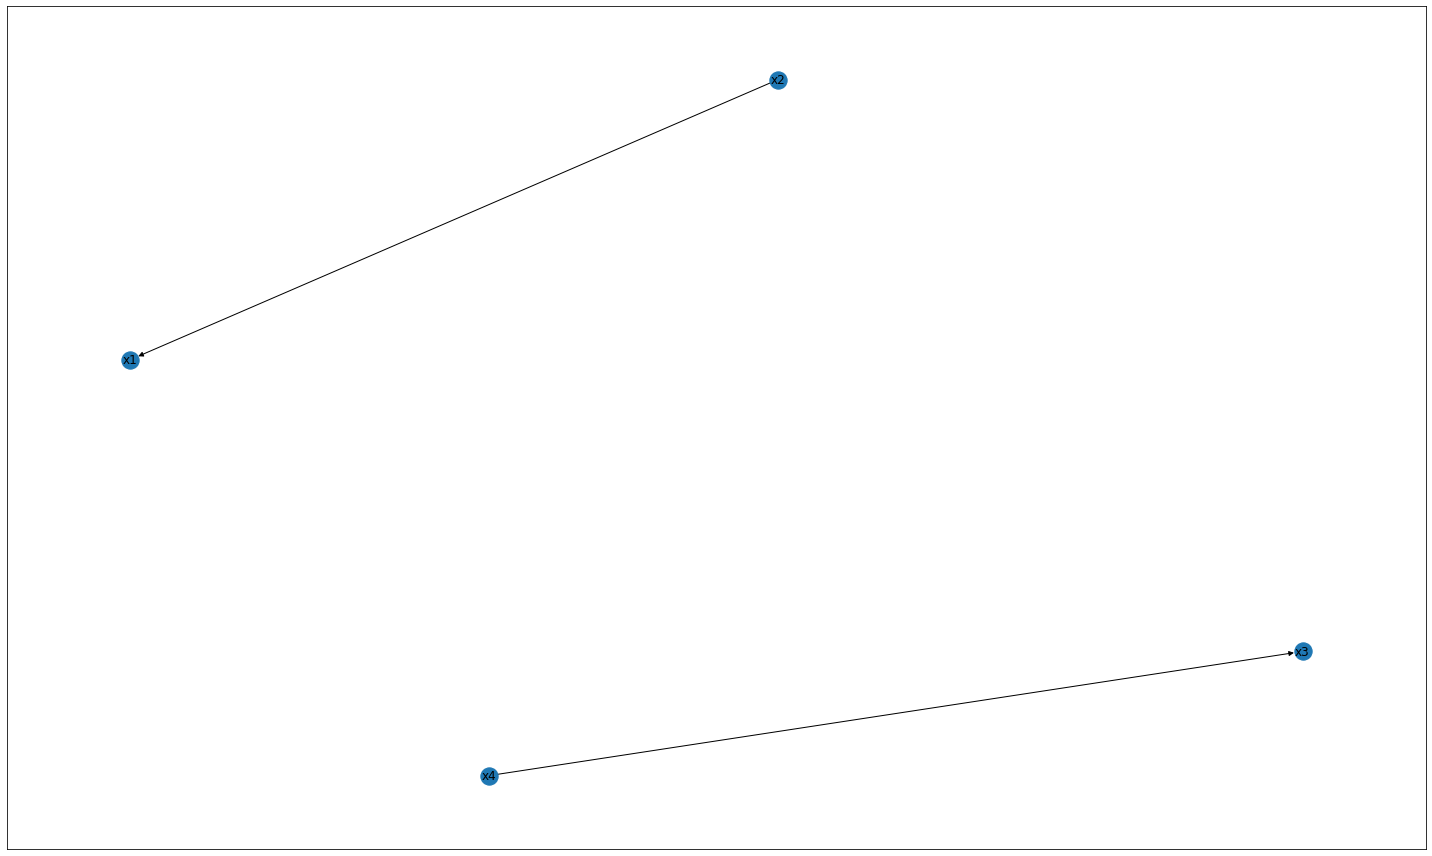

In [48]:

from pgmpy.estimators import PC
from sklearn.preprocessing import StandardScaler
from pgmpy.estimators import BicScore
import numpy as np

# Standardize the data before applying causal discovery algorithms
scaler = StandardScaler()
data_std = scaler.fit_transform(np.vstack([x1, x2, x3, x4]).T)

# Create a data frame as required by the PC algorithm in pgmpy
import pandas as pd
data_df = pd.DataFrame(data_std, columns=['x1', 'x2', 'x3', 'x4'])

# Initialize PC estimator with the data and the Bic Score
c = PC(data_df)

# The significance level for independence tests
alpha = 0.05

# Estimate the DAG
max_cond_vars = len(data_df.columns) - 2  # Maximum condition sets size
dag = c.estimate(return_type="dag", significance_level=alpha, max_cond_vars=max_cond_vars, ci_test="pearsonr")

# Print the edges of the DAG
print("Edges in the estimated DAG:")
print(dag.edges())

# Visualize the DAG if you have networkx and matplotlib installed
import networkx as nx
import matplotlib.pyplot as plt

nx.draw_networkx(dag, arrows=True)
plt.show()


In [ ]:
from causallearn.search.ConstraintBased.CDNOD import cdnod

# default parameters
cg = cdnod(data, c_indx)

# or customized parameters
cg = cdnod(data, c_indx, alpha, indep_test, stable, uc_rule, uc_priority, mvcdnod,
      correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
# note that the last node is the c_indx
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

In [ ]:
data.values

In [ ]:
data = np.column_stack((x1, x2, x3, x4))

# Assuming the entire series under a single domain for simplicity
#c_indx = 0  # You might need to adapt this based on your domain knowledge

# CDNOD analysis with your parameters
cg = cdnod(data, alpha=0.05)


# Visualization using pydot
pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')


In [ ]:
data.shape

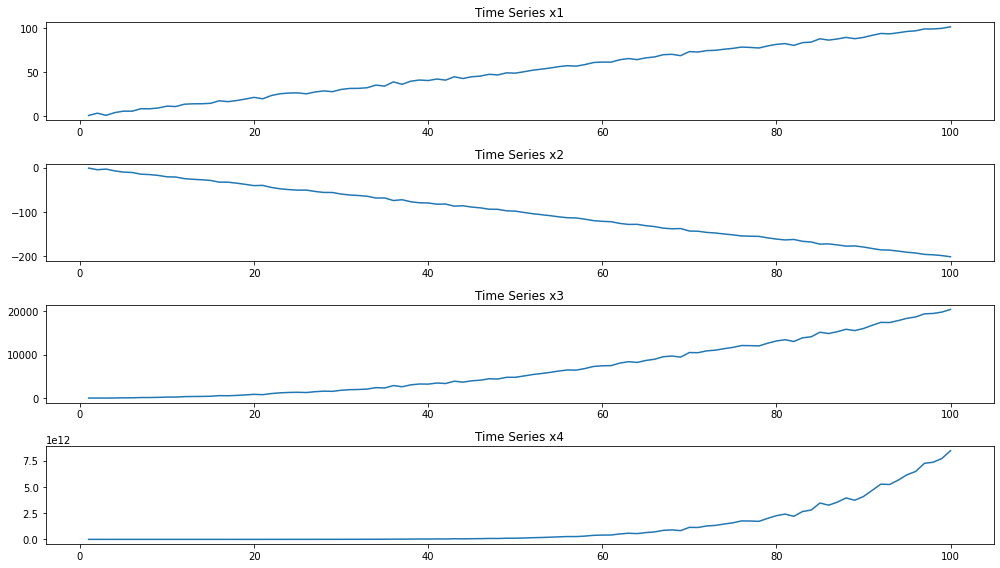

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100  # Length of the time series
alpha = 1.0  # Value of alpha
beta = 0.5  # Value of beta
noise_std = 1.0  # Standard deviation of noise

# Time vector
t = np.linspace(1, N, N)

# Piecewise function β(t)
beta_t = np.where(t <= N / 2, 0, beta)

# Function z(t) = αt + β(t)
z_t = alpha * t + beta_t

# Noise terms
e1 = np.random.normal(0, noise_std, N)
e2 = np.random.normal(0, noise_std, N)
e3 = np.random.normal(0, noise_std, N)
e4 = np.random.normal(0, noise_std, N)

# Equations for x1, x2, x3, x4
x1 = z_t + e1
x2 = -2 * x1 +e1
x3 = -x1 * x2 + e3
x4 = x3**3 - x2**2  + e4

# Plot the time series
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(t, x1)
plt.title('Time Series x1')

plt.subplot(4, 1, 2)
plt.plot(t, x2)
plt.title('Time Series x2')

plt.subplot(4, 1, 3)
plt.plot(t, x3)
plt.title('Time Series x3')

plt.subplot(4, 1, 4)
plt.plot(t, x4)
plt.title('Time Series x4')

plt.tight_layout()
plt.show()


In [47]:
data["x1"]

0       0.391334
1       2.986734
2       0.534365
3       3.659446
4       5.295996
         ...    
95     96.538230
96     98.646478
97     98.614933
98     99.323473
99    101.038796
Name: x1, Length: 100, dtype: float64

c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warni

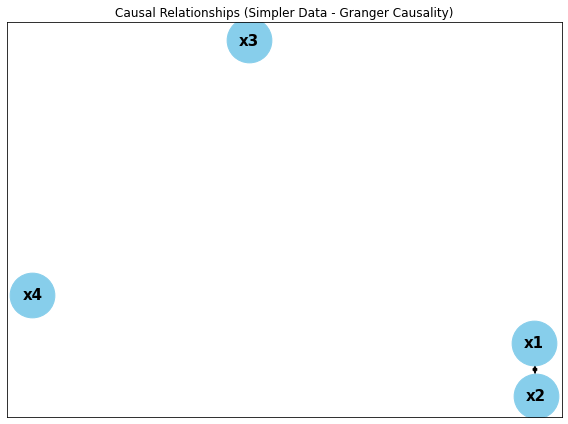

(None,
     x1  x2  x3  x4
 x2   1   0   0   0
 x3   0   0   0   0
 x4   0   0   0   0
 x1   0   1   0   0)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx


data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

data_simple = data


# Granger causality tests
max_lag = 2
alpha_significance = 0.05
granger_test_results = {}

for var in data_simple.columns:
    granger_test_results[var] = {}
    for causing_var in data_simple.columns:
        if var != causing_var:
            test_result = grangercausalitytests(data_simple[[var, causing_var]], max_lag, verbose=False)
            min_p_value = min(test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag + 1))
            granger_test_results[var][causing_var] = min_p_value

# Convert results to DataFrame and identify significant relationships
p_values_df = pd.DataFrame(granger_test_results)
significant_relationships = (p_values_df < alpha_significance).astype(int)

# Plot the causal graph
G = nx.from_pandas_adjacency(significant_relationships, create_using=nx.DiGraph)

plt.figure(figsize=(8, 6))

nx.draw_networkx(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold')
plt.title('Causal Relationships (Simpler Data - Granger Causality)')
plt.show(), significant_relationships


In [37]:
data.values

array([[ 3.91334218e-01, -1.39133422e+00,  1.72762863e+00,
         3.45562937e+00],
       [ 2.98673357e+00, -4.98673357e+00,  1.26925975e+01,
         2.01878446e+03],
       [ 5.34365124e-01, -3.53436512e+00,  1.46972239e+00,
        -9.90704962e+00],
       [ 3.65944562e+00, -7.65944562e+00,  2.76429382e+01,
         2.10642482e+04],
       [ 5.29599555e+00, -1.02959955e+01,  5.47194083e+01,
         1.63737083e+05],
       [ 5.24338109e+00, -1.12433811e+01,  6.07353497e+01,
         2.23912497e+05],
       [ 8.05676464e+00, -1.50567646e+01,  1.22415988e+02,
         1.83426068e+06],
       [ 7.97354882e+00, -1.59735488e+01,  1.28669665e+02,
         2.12998569e+06],
       [ 8.89460980e+00, -1.78946098e+01,  1.59866073e+02,
         4.08540520e+06],
       [ 1.09876630e+01, -2.09876630e+01,  2.28546500e+02,
         1.19373438e+07],
       [ 1.05258978e+01, -2.15258978e+01,  2.28382968e+02,
         1.19117127e+07],
       [ 1.31799535e+01, -2.51799535e+01,  3.32294293e+02,
      

  0%|          | 0/4 [00:00<?, ?it/s]

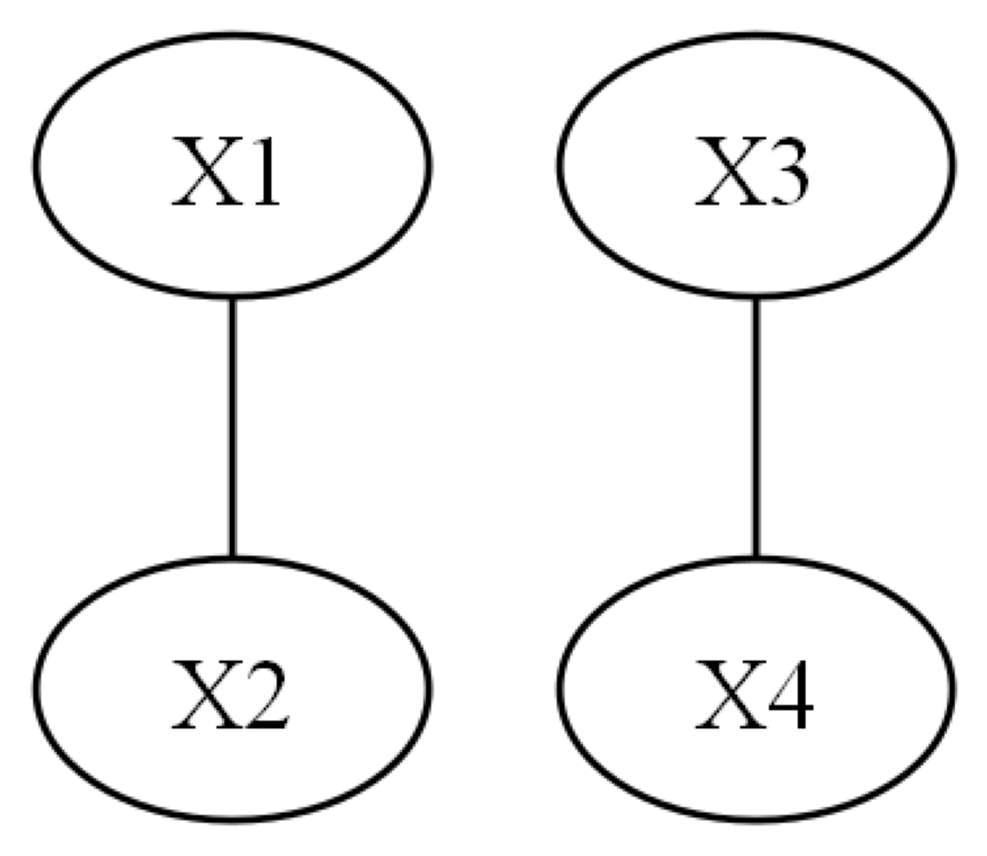

AttributeError: 'CausalGraph' object has no attribute 'nx'

In [41]:
from causallearn.search.ConstraintBased.PC import pc
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

# default parameters
cg = pc(data.values)

# or customized parameters
#cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

# # visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

In [45]:
from causallearn.search.ConstraintBased.FCI import fci

# default parameters
g, edges = fci(data.values)

# or customized parameters
# g, edges = fci(data, independence_test_method, alpha, depth, max_path_length,
#     verbose, background_knowledge, cache_variables_map)

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g)
pdy.write_png('FCI_simple_test.png')
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

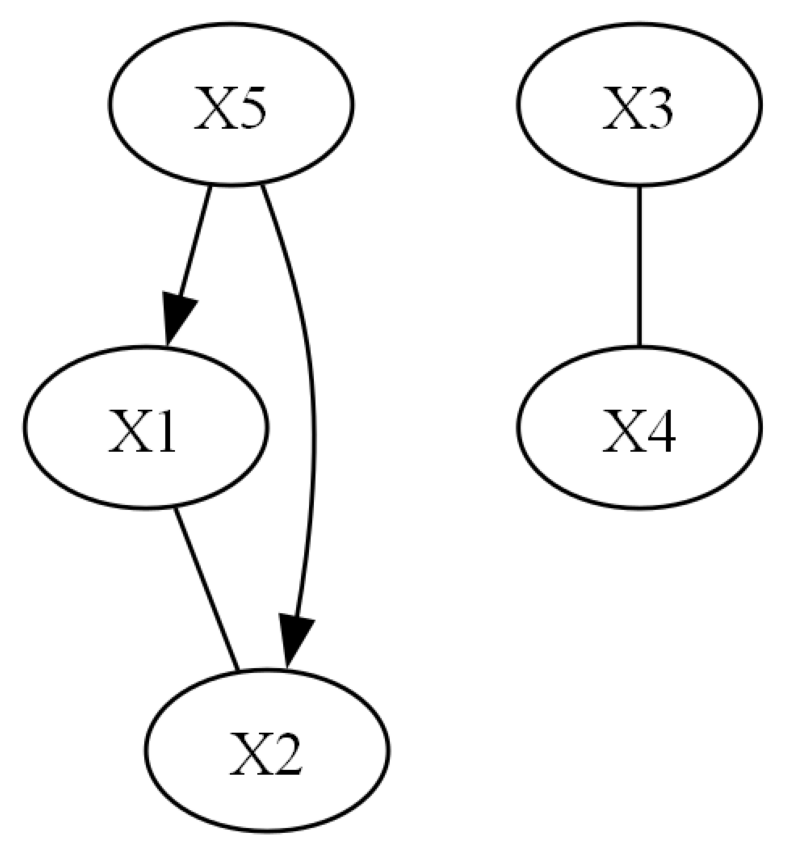

In [44]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.CDNOD import cdnod
from causallearn.utils.GraphUtils import GraphUtils
import pydot
import os

graphviz_path = r'C:\Program Files\Graphviz\bin'
os.environ["PATH"] += os.pathsep + graphviz_path

# Assuming you have the time series data from previous code in the variables x1, x2, x3, x4
# Now create a DataFrame from your time series data
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

# # Create the 'c_indx' array. If it represents a time index, it could just be the time steps:
# c_indx = np.arange(1, N+1)  # Assuming N is the length of your time series

# # Now add c_indx as a new column to your DataFrame
# data['c_indx'] = c_indx
c_indx = np.arange(1, N+1).reshape(-1, 1)

# Make sure you pass the entire DataFrame to cdnod
# Specify the index of the c_indx column, which is the last column in the DataFrame
#cg = cdnod(data, c_indx )
cg = cdnod(data, c_indx, alpha=0.05, indep_test='fisherz', stable=True, uc_rule=0, uc_priority=1, mvcdnod=False,
           correction_name='MV_Crtn_Fisher_Z', background_knowledge=None, verbose=False, show_progress=True)


# Visualize using pydot
cg.draw_pydot_graph()

# Save the graph to a PNG file
pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('cdnod_causal_graph.png')


In [27]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(data)

# or customized parameters
Record = ges(data, score_func, maxP, parameters)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

NameError: name 'score_func' is not defined

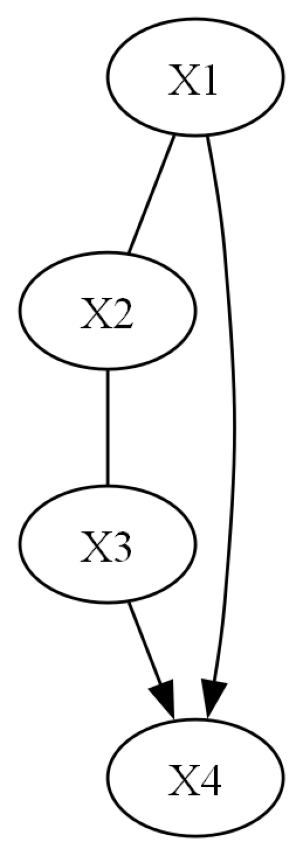

In [28]:
import numpy as np
import pandas as pd
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

# Assuming 'data_array' is your data loaded as a numpy array
# data_array = np.array([...])  # Make sure this is defined
data_array = data.values
# Running GES with default parameters
Record = ges(data_array)

# Visualization of the learned causal graph
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Saving the graph to a PNG file
pyd.write_png('ges_causal_graph.png')


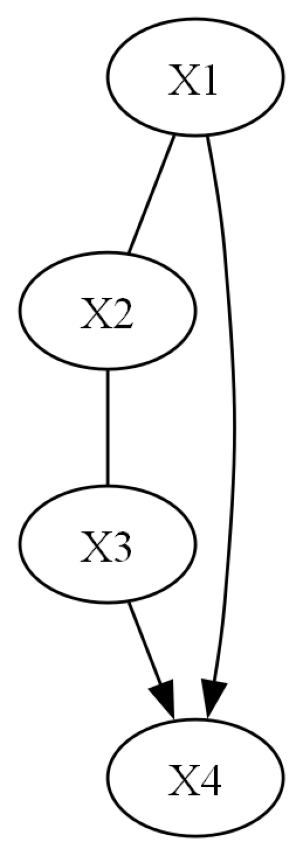

In [31]:
# Custom parameters
score_func = 'local_score_BIC'  # Example of specifying the BIC score function
maxP = 3  # Maximum number of parents

# Running GES with custom parameters
Record = ges(data_array, score_func=score_func, maxP=maxP)

# The rest is the same as above for visualization and saving

# Visualization of the learned causal graph
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Saving the graph to a PNG file
pyd.write_png('ges_causal_graph.png')


In [ ]:
cg

In [ ]:
from pgmpy.estimators import FCI
from pgmpy.models import BayesianNetwork
from pgmpy.independencies import Independencies

# Assuming you have your data in a DataFrame `data`
# where the columns are named 'x1', 'x2', 'x3', and 'x4'.

# Instantiate the FCI object
fci = FCI(data)

# The significance level for independence tests should be set appropriately.
# Here, we set it to 0.05.
significance_level = 0.05

# Find the pattern (DAG), which includes undirected, directed, and bidirected edges
pattern = fci.estimate_skeleton(significance_level=significance_level)
edges = pattern.edges()

# Print out the edges
print("Edges in the estimated DAG:", edges)

# We can convert the pattern to a DAG by resolving the undirected edges,
# although it's important to note that FCI typically yields a partial ancestral graph (PAG)
# which represents a Markov equivalence class of DAGs.
# However, for simplicity, we'll use the `to_directed()` method from the networkx library.
# This method doesn't give the correct causal directions for FCI but will give a DAG
# that represents one possibility within the Markov equivalence class.
dag = pattern.to_directed()

# Now you can visualize the DAG using networkx or any other preferred visualization library.
import networkx as nx
import matplotlib.pyplot as plt

# Draw the DAG
nx.draw_networkx(dag, with_labels=True)
plt.show()


In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

In [ ]:
np.random.seed(42)     # Fix random seed to make results reproducable
def lin_f(x): return x # A linear dependency function
links_coeffs = {0: [((0, -1), 0.7, lin_f), ((1, -1), -0.8, lin_f)],
                1: [((1, -1), 0.8, lin_f), ((3, -1), 0.8, lin_f)],
                2: [((2, -1), 0.5, lin_f), ((1, -2), 0.5, lin_f), ((3, -3), 0.6, lin_f)],
                3: [((3, -1), 0.4, lin_f)]} #stores the functional dependencies of the SCM
T = 1000     # time series length
data, true_parents_neighbors = toys.structural_causal_process(links_coeffs, T=T) #generate the timeseries
T, N = data.shape

# Initialize dataframe object, specify time axis and variable names
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

In [ ]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

In [ ]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args={'var_names':var_names, 
                                   'x_base':5, 'y_base':.5}); plt.show()

In [ ]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None, alpha_level=0.01)
##

In [ ]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

In [ ]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

In [ ]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

In [ ]:
%pip install ipykernel --update-deps --force-reinstall

In [2]:
import networkx as nx
import numpy as np
from numpy.random import default_rng
rng = default_rng(seed=111)
from timeawarepc.tpc import cfc_tpc, cfc_pc
from timeawarepc.gc import cfc_gc
from timeawarepc.simulate_data import *
from timeawarepc.find_cfc import *

In [3]:
model = 'lingauss'
T=1000
noise = 1

data, CFCtruth = simulate_data(model, T = 1000, noise = 1)

In [16]:
data = data.values 

In [17]:
data

array([[ 3.91334218e-01, -1.39133422e+00,  1.72762863e+00,
         3.45562937e+00],
       [ 2.98673357e+00, -4.98673357e+00,  1.26925975e+01,
         2.01878446e+03],
       [ 5.34365124e-01, -3.53436512e+00,  1.46972239e+00,
        -9.90704962e+00],
       [ 3.65944562e+00, -7.65944562e+00,  2.76429382e+01,
         2.10642482e+04],
       [ 5.29599555e+00, -1.02959955e+01,  5.47194083e+01,
         1.63737083e+05],
       [ 5.24338109e+00, -1.12433811e+01,  6.07353497e+01,
         2.23912497e+05],
       [ 8.05676464e+00, -1.50567646e+01,  1.22415988e+02,
         1.83426068e+06],
       [ 7.97354882e+00, -1.59735488e+01,  1.28669665e+02,
         2.12998569e+06],
       [ 8.89460980e+00, -1.78946098e+01,  1.59866073e+02,
         4.08540520e+06],
       [ 1.09876630e+01, -2.09876630e+01,  2.28546500e+02,
         1.19373438e+07],
       [ 1.05258978e+01, -2.15258978e+01,  2.28382968e+02,
         1.19117127e+07],
       [ 1.31799535e+01, -2.51799535e+01,  3.32294293e+02,
      

In [18]:
method_name = 'TPC'#'GC'#'PC'

alpha = 0.05
maxdelay=1
isgauss = (model == 'lingauss')
adjmat, causaleffmat = find_cfc(data,method_name,alpha=alpha,maxdelay=maxdelay,isgauss=isgauss)

ValueError: Sample larger than population or is negative

In [6]:
print('Ground Truth CFC adjacency:')
print(CFCtruth)
print('Estimated CFC adjacency by '+method_name+':')
print(adjmat)

Ground Truth CFC adjacency:
[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
Estimated CFC adjacency by TPC:
[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]


In [7]:
method_name = 'TPC'#'GC'#'PC'

alpha = 0.05
isgauss = (model == 'lingauss')
if method_name == 'TPC':
    maxdelay=1
    niter = 50
    thresh = 0.25
    adjmat, causaleffmat = cfc_tpc(data,maxdelay=maxdelay,alpha=alpha,niter=niter,thresh=thresh,isgauss=isgauss)
elif method_name == 'PC':
    adjmat, causaleffmat = cfc_pc(data,alpha,isgauss=isgauss)
elif method_name == 'GC':
    adjmat, causaleffmat = cfc_gc(data,maxdelay,alpha)

In [8]:
print('Ground Truth CFC adjacency:')
print(CFCtruth)
print('Estimated CFC adjacency by '+method_name+':')
print(adjmat)

Ground Truth CFC adjacency:
[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
Estimated CFC adjacency by TPC:
[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
